In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from astropy.io import fits
import numpy as np

## Question 1

Take the data from the file (dataset.txt) and create a normalized histogram using ``matplotlib``. Play with the different plotting options like bin width, colors, line widths, etc. Calculate the mean and standard deviation using the ``numpy.mean`` and ``numpy.std`` functions.

Text(0, 0.5, 'norm Frequency')

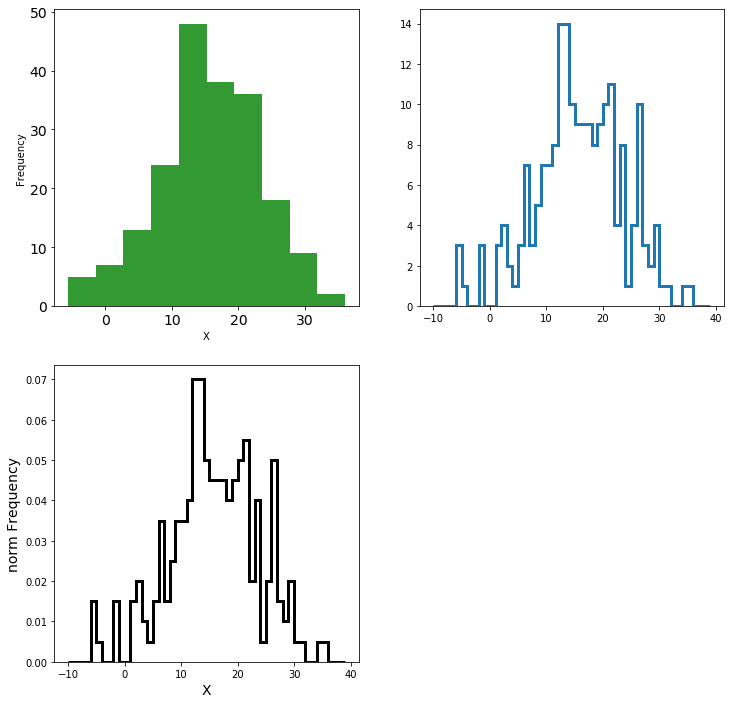

In [2]:
data = []
with open("dataset.txt") as f: 
    for line in f: 
        data.append(float(line))

        
plt.figure(figsize=(12,12))
ax1 = plt.subplot(221)
h1 = ax1.hist(data, color="green", alpha=0.8)
ax1.set_xlabel("X")
ax1.set_ylabel("Frequency")

ax1.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax2 = plt.subplot(222)
bins = np.arange(-10,40,1)
h2 = ax2.hist(data, bins, histtype="step", lw=3)

ax3 = plt.subplot(223)
bins = np.arange(-10,40,1)
h3 = ax3.hist(data, bins, histtype="step", lw=3, density="normed", color="k")
ax3.set_xlabel("X", fontsize =14)
ax3.set_ylabel("norm Frequency", fontsize =14)


In [3]:
print("Mean", np.mean(data))
print("Median", np.median(data))
print("Standard deviation", np.std(data))

Mean 15.656996715428251
Median 15.747552853555849
Standard deviation 7.867424593692052


## Question 2

Take the dataset from the previous example and fit a gaussian distribution using ``norm.fit``
from ``scipy.stats``. Plot the result over the the histogram of the dataset and check the
resulting values for the mean and standard deviation calculated above. 

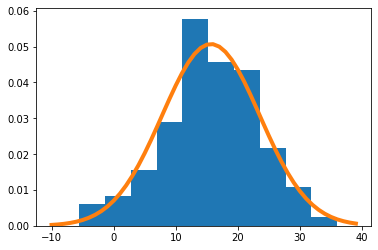

In [4]:
fit = norm.fit(data)

h3 = plt.hist(data,  lw=3, density="normed")
x = np.arange(-10,40)
y = norm.pdf(x, loc=fit[0], scale=fit[1])
plt.plot(x, y, lw=4)


## Question 3

 The ``matplotlib`` library can also be used to create 2D images from arrays. 
   This is very useful for plotting FITS (Flexible Image Transport System) files.
   FITS is a data format with widespread use in astronomy.
     
   Try and convert the provided image `SN2012aw.fits` into an array using the ``io.fits`` 
   package from ``astropy``. 
   
   You can then plot the image using the ``imshow()`` function from ``matplotlib.pyplot``.
   Please experiment with the color and the normalisation of the image.
   
   Note that FITS files contain more information than just the image. What is this information?

Filename: SN2012aw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (736, 1092)   float32   


/home/mverdugo/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


None


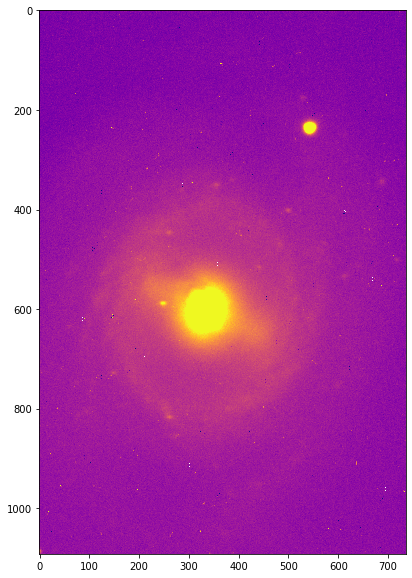

In [5]:
hdu = fits.open("SN2012aw.fits")
data = hdu[0].data
header = hdu[0].header
plt.figure(figsize=(10,10))
plt.imshow(np.log10(data), cmap="plasma", vmin=3.9, vmax=4.1)
print(hdu.info())

## Question 4

Similar as above: load the image `SN2012aw.fits` with ``astropy.io.fits`` and make a 
   few statistics of the image using ``numpy`` statistical functions 
   (e.g. mean, median, standard deviation, minimum and maximum value)
   
   - What is the size of the image?
   - Do the same for a region of the image. Array indexing should work here too. 

mean 9406.676
median 9239.911
stddev 1211.0697
min -44827.184
max 110504.62
Image size (1092, 736)

** subimage **
mean 11539.631
median 10425.653
stddev 3434.7017
min -9302.7
max 34399.61


/home/mverdugo/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


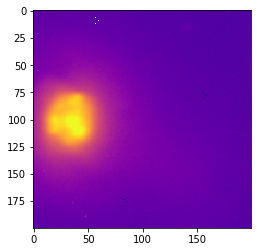

In [6]:
print("mean", np.mean(data))
print("median", np.median(data))
print("stddev", np.std(data))
print("min", np.min(data))
print("max", np.max(data))

print("Image size", data.shape) # or from hdu.info()

subdata = data[500:700, 300:500]
plt.imshow(np.log10(subdata), cmap="plasma", vmin=3.9, vmax=4.5)

print()
print("** subimage **")
print("mean", np.mean(subdata))
print("median", np.median(subdata))
print("stddev", np.std(subdata))
print("min", np.min(subdata))
print("max", np.max(subdata))

## Question 5
Create a histogram of the image pixel values as in question 1 and try to fit a gaussian as 
   in question 2. Discuss the results. 

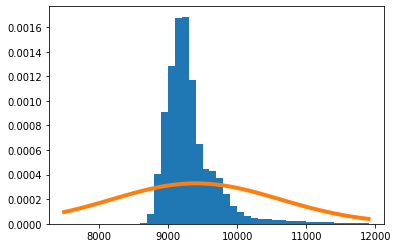

In [7]:
bins=np.arange(7500,0.12e5,100)
values = data.flatten()
fit = norm.fit(values)

h3 = plt.hist(values, bins,   lw=3, density="normed")
x = bins
y = norm.pdf(x, loc=fit[0], scale=fit[1])
plt.plot(x, y, lw=4)
